
# --------- Step 1: Import Libraries, Download Dataset, and Explore Data --------- #

In [7]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [8]:
# Download dataset
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

# Load dataset
file_path = os.path.join(path, "Life Expectancy Data.csv")  # Adjust if necessary
df = pd.read_csv(file_path)

In [9]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
print(df.head())
print(df.info())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [11]:
#Run statistical summaries 
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# --------- Step 2: Detect Data Leakage Check --------- #

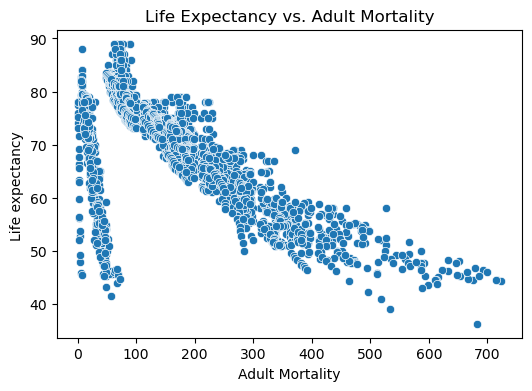

In [12]:
# Correlation Check!

# Plot Life Expectancy vs. Adult Mortality
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Adult Mortality"], y=df["Life expectancy "])
plt.title("Life Expectancy vs. Adult Mortality")
plt.show()


# --------- Step 3: Handle Multicolinearity --------- #

In [13]:
# Selecting relevant columns and dropping missing values
df_filtered = df[['Life expectancy ', 'Adult Mortality', 'infant deaths']].dropna()

# Calculate correlation coefficients
correlation_adult_mortality = df_filtered['Life expectancy '].corr(df_filtered['Adult Mortality'])
correlation_infant_deaths = df_filtered['Life expectancy '].corr(df_filtered['infant deaths'])

# Print the correlation values
print(f"Correlation between Life Expectancy and Adult Mortality: {correlation_adult_mortality:.4f}")
print(f"Correlation between Life Expectancy and Infant Deaths: {correlation_infant_deaths:.4f}")

Correlation between Life Expectancy and Adult Mortality: -0.6964
Correlation between Life Expectancy and Infant Deaths: -0.1966


In [14]:
# Selecting numerical columns for VIF check
numerical_cols = df.select_dtypes(include=[np.number]).drop(columns=['Life expectancy ']).dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_cols.values, i) for i in range(len(numerical_cols.columns))]

print(vif_data)

                            Feature         VIF
0                              Year   69.402702
1                   Adult Mortality    5.039780
2                     infant deaths  227.673799
3                           Alcohol    4.403199
4            percentage expenditure   14.874797
5                       Hepatitis B   17.478071
6                          Measles     1.587601
7                              BMI     8.492877
8                under-five deaths   216.993766
9                             Polio   25.445368
10                Total expenditure    8.632396
11                      Diphtheria    33.938559
12                         HIV/AIDS    1.642925
13                              GDP   16.693719
14                       Population    2.027472
15             thinness  1-19 years   16.065488
16               thinness 5-9 years   16.024455
17  Income composition of resources   38.375960
18                        Schooling   69.667156


In [15]:
# Drop 'Adult Mortality' due to data leakage
df.drop(columns=['Adult Mortality'], inplace=True)

In [16]:
# Replace missing values in Hepatitis B with 0 (assumption: young people may not have it)
df["Hepatitis B"].fillna(0, inplace=True)

C:\Users\dj_ri\AppData\Local\Temp\ipykernel_32492\665911424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hepatitis B"].fillna(0, inplace=True)


# --------- Step 4: Create "Lagged Life Expectancy" Column --------- #

In [17]:
# Sort by Country and Year to ensure proper shifting
df.sort_values(by=['Country', 'Year'], inplace=True)

In [18]:
# Create 'Lagged Life Expectancy' by shifting within each country
df['Lagged Life Expectancy'] = df.groupby('Country')['Life expectancy '].shift(-1)

In [19]:
# Drop first year per country due to NaN in 'Lagged Life Expectancy'
df.dropna(subset=['Lagged Life Expectancy'], inplace=True)

In [20]:
# Drop 'Year' column
df.drop(columns=['Year'], inplace=True)

# --------- Step 5: Handle Missing Values --------- #

In [21]:
# Handle missing values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)  # Use median for numerical columns

C:\Users\dj_ri\AppData\Local\Temp\ipykernel_32492\1608082191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Use median for numerical columns


# --------- Step 6: Train-Test Split BEFORE Encoding & Scaling --------- #


In [22]:
# Train-test split
X = df.drop(columns=['Life expectancy '])
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Separate categorical columns
categorical_cols = ["Country", "Status"]
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# --------- Step 7: Encode Categorical Variables --------- #

In [24]:
# Encode training data
X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

In [25]:
# Convert the encoded data back to DataFrame
X_train_cat_df = pd.DataFrame(X_train_cat, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, index=X_test.index)

# Drop categorical columns from original data and add encoded versions
X_train.drop(columns=categorical_cols, inplace=True)
X_test.drop(columns=categorical_cols, inplace=True)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_cat_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_cat_df.reset_index(drop=True)], axis=1)

In [26]:
# Convert column names to strings (to ensure compatibility)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Handle missing values if necessary
for col in X_train.select_dtypes(include=['float64', 'int64']).columns:
    X_train[col].fillna(X_train[col].median(), inplace=True)
    X_test[col].fillna(X_test[col].median(), inplace=True)

C:\Users\dj_ri\AppData\Local\Temp\ipykernel_32492\3870360752.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].median(), inplace=True)
C:\Users\dj_ri\AppData\Local\Temp\ipykernel_32492\3870360752.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


# --------- Step 8: Train Random Forest (Prior to Scaling) --------- #

In [27]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")

Random Forest R² Score: 0.9742
Random Forest MSE: 2.4434


# --------- Step 9: Scale Numerical Features --------- #

In [28]:
# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Scale Numerical Features
scaler = StandardScaler()

# Fit ONLY on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (optional, but useful)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


# --------- Step 10: Train Linear Regression Model --------- #

In [29]:
#Train & Evaluate Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression R² Score: {r2_lr:.4f}")
print(f"Linear Regression MSE: {mse_lr:.4f}")

#Compare with Random Forest
print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")

Linear Regression R² Score: 0.9697
Linear Regression MSE: 2.8684
Random Forest R² Score: 0.9742
Random Forest MSE: 2.4434


# --------- Step 11: Scatter Plot of Predicted vs Actual Life Expectancy: --------- #

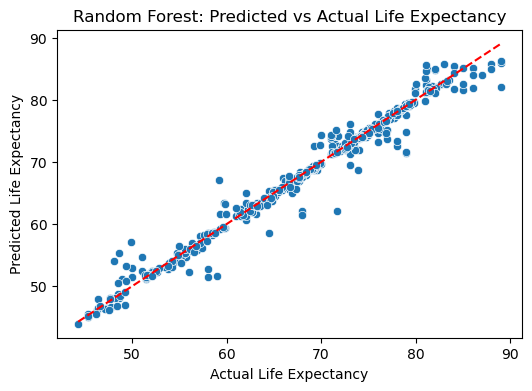

In [30]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Random Forest: Predicted vs Actual Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show()




# --------- Step 12: Plot Residuals to Check if model is Underperforming --------- #

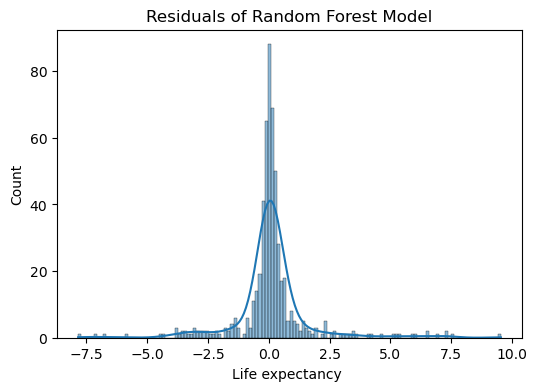

In [31]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Residuals of Random Forest Model')
plt.show()


# --------- Step 13: Distribution of Life Expectancy: --------- #

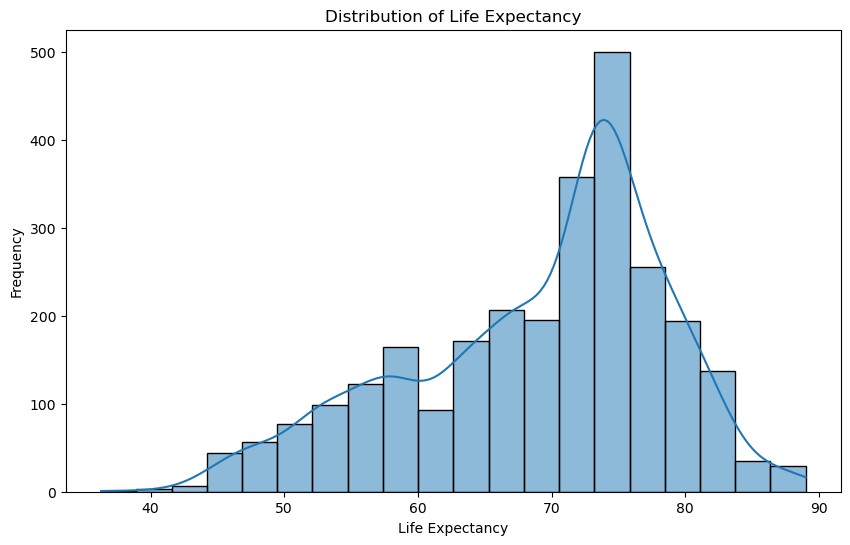

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '], bins=20, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


# --------- Step 14: Evaluate Overfitting: --------- #

In [33]:
#list features by importance with names
feature_importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)


                             Feature    Importance
0             Lagged Life Expectancy  9.766354e-01
1                           HIV/AIDS  2.599734e-03
2                         Population  1.530358e-03
3    Income composition of resources  1.526886e-03
4                  Total expenditure  1.519880e-03
..                               ...           ...
196                               55  2.877532e-08
197                               86  2.775891e-08
198                               98  2.738790e-08
199                              173  1.569136e-08
200                               12  1.184759e-08

[201 rows x 2 columns]


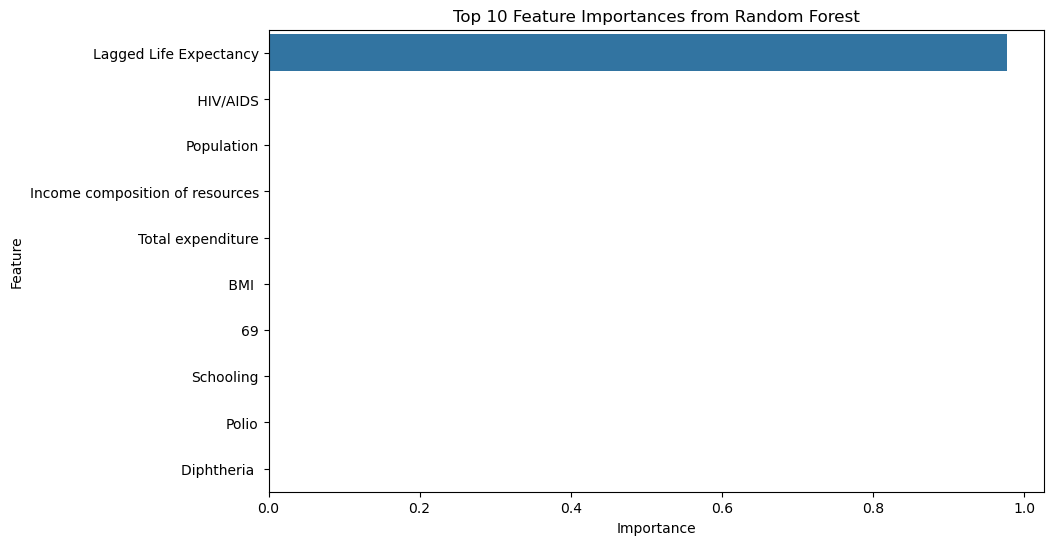

In [57]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# --------- Step 15: Test Without Lagged Life Expectency --------- #

In [83]:
#reimport the X_train, X_test, y_train, y_test csv files
X_train = pd.read_csv('resources/X_train.csv')
X_test = pd.read_csv('resources/X_test.csv')
y_train = pd.read_csv('resources/y_train.csv')
y_test = pd.read_csv('resources/y_test.csv')


In [84]:
#Drop Lagged Life Expectancy from all datasets
X_train.drop(columns=['Life_expectancy_lag1'], inplace=True)
X_test.drop(columns=['Life_expectancy_lag1'], inplace=True)

In [85]:
# Convert y_train and y_test to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Retrain the Random Forest model without Lagged Life Expectancy
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest R² Score (without Lagged Life Expectancy): {r2_rf:.4f}")
print(f"Random Forest MSE (without Lagged Life Expectancy): {mse_rf:.4f}")
print("\n")

# Retrain the linear regression model without Lagged Life Expectancy
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression R² Score (without Lagged Life Expectancy): {r2_lr:.4f}")
print(f"Linear Regression MSE (without Lagged Life Expectancy): {mse_lr:.4f}")


Random Forest R² Score (without Lagged Life Expectancy): 0.9557
Random Forest MSE (without Lagged Life Expectancy): 4.1674


Linear Regression R² Score (without Lagged Life Expectancy): 0.7675
Linear Regression MSE (without Lagged Life Expectancy): 21.8891


# --------- Step 16: Evaluate Other Models and Choose One for tuning: --------- #

In [ ]:
# Import all sklearn regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Create a list of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Neighbors': KNeighborsRegressor()
}

# Initialize a DataFrame to store results
results = []

# Loop through models, fit, predict, and evaluate
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({'Model': model_name, 'R² Score': r2, 'MSE': mse})

# Convert results list to DataFrame
results = pd.DataFrame(results)

# Display results
print(results)


                       Model  R² Score        MSE
0          Linear Regression  0.767486  21.889102
1           Ridge Regression  0.767937  21.846672
2           Lasso Regression  0.700812  28.165825
3      ElasticNet Regression  0.707299  27.555167
4              Random Forest  0.955646   4.175537
5          Gradient Boosting  0.922102   7.333437
6  Support Vector Regression  0.794080  19.385516
7              Decision Tree  0.917024   7.811475
8                K-Neighbors  0.871065  12.138026


# --------- Step 17: Apply Hypertuning to SVR Model: --------- #

In [ ]:
#Utilize hyperparameter tuning on SVR model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVR
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [1, 10],
    'gamma': ['scale', 'auto']
}

# Initialize SVR model
svr = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best r2 score
best_params = grid_search.best_params_
best_r2 = grid_search.best_score_

y_pred_best = grid_search.best_estimator_.predict(X_test_scaled)
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Parameters: {best_params}")
print(f"Best R² on Test data: {r2_best:.4f}")
print(f"MSE on Test data: {mse_best:.4f}")

print("\n")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated R²: 0.8876
Best R² on Test data: 0.8715
MSE on Test data: 12.0935


